In [2]:
import sys
sys.path.append("../../utils/")
import fba_utils

import cobra
import matplotlib.pyplot as plt
import importlib
importlib.reload(fba_utils)
import tqdm
import numpy as np

# Read all relevant models

In [9]:
ich360=cobra.io.read_sbml_model('../../Model/iCH360/Escherichia_coli_iCH360.xml')
ich360_red=cobra.io.read_sbml_model('../../Model/iCH360red/iCH360red.xml')
iml1515=cobra.io.read_sbml_model('../data/metabolic_models/iML1515/iML1515.xml')
ecc=cobra.io.read_sbml_model('../data/metabolic_models/ecoli_core/e_coli_core.xml')
ecc.reactions.ATPM.lower_bound=ich360.reactions.ATPM.lower_bound #for comparability

ecc2=cobra.io.read_sbml_model('../data/metabolic_models/ecc2/ecc2_standardized.xml')
ecc2.reactions.ATPM.lower_bound=ich360.reactions.ATPM.lower_bound #for comparability


In [10]:

ich360.reactions.EX_glc__D_e.lower_bound=0.
ich360_red.reactions.EX_glc__D_e.lower_bound=0.
iml1515.reactions.EX_glc__D_e.lower_bound=0.
ecc.reactions.EX_glc__D_e.lower_bound=0.
ecc2.reactions.EX_glc__D_e.lower_bound=0.

## Graphic parameters

In [5]:
aerobic_color="#ff5460ff"
anaerobic_color="#1484ffff"
iml1515_color='#80511f'
ich360red_color=iml1515_color
ecc_color=iml1515_color
ecc2_color='#e92ea3ff'
grid_alpha=0.3

# iCH360 vs iMl1515 

## Growth on Glucose 

0it [00:00, ?it/s]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp_yqf4y3v.lp
Reading time = 0.02 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmppikkxhiv.lp
Reading time = 0.02 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp9xw23ej4.lp
Reading time = 0.01 seconds
: 304 rows, 698 columns, 2988 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp07lwbh1q.lp
Reading time = 0.01 seconds
: 304 rows, 698 columns, 2988 nonzeros


1it [00:10, 10.72s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpeh5buo8v.lp
Reading time = 0.02 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpsru2raya.lp
Reading time = 0.02 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp0l1wqcv_.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp70ygr4kf.lp
Reading time = 0.01 seconds
: 304 rows, 698 columns, 2988 nonzeros


2it [00:24, 12.48s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp6p9cypgy.lp
Reading time = 0.03 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp_ujpi6dz.lp
Reading time = 0.04 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpk70qsklq.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp2escqu9p.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


3it [00:39, 13.82s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmptuj35dsn.lp
Reading time = 0.03 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpp7trqb0u.lp
Reading time = 0.03 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp54efrcll.lp
Reading time = 0.00 seconds
: 304 rows, 698 columns, 2988 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpy2e16bhq.lp
Reading time = 0.01 seconds
: 304 rows, 698 columns, 2988 nonzeros


4it [00:53, 13.35s/it]


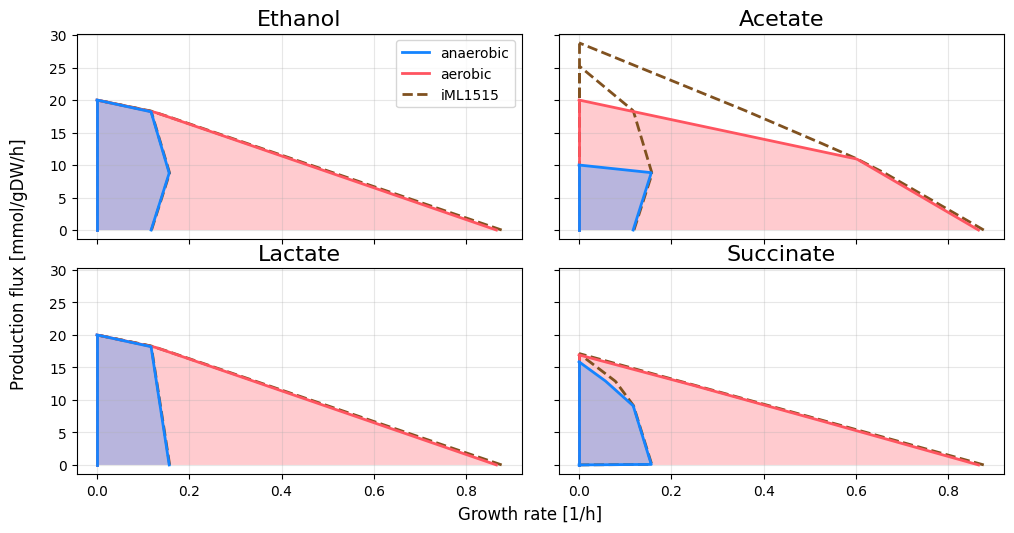

In [6]:
carbon_source='glc__D'
products=['EX_etoh_e','EX_ac_e','EX_lac__D_e','EX_succ_e']
product_names=['Ethanol','Acetate','Lactate','Succinate']
fig,ax=plt.subplots(int(np.ceil(len(products)/2)),2,figsize=(10,5),sharex=True,sharey=True)
plt.tight_layout()

for k,product in tqdm.tqdm(enumerate(products)):
    coords=np.unravel_index(k,ax.shape)
        #iML1515======
    #aerobic
    fba_utils.plot_envelope(wt_model=iml1515,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        color=iml1515_color,
                        ls='--',
                        label='iML1515',
                        fill=False)
    #anaerobic
    fba_utils.plot_envelope(wt_model=iml1515,
                        knockouts=['EX_o2_e'],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        color=iml1515_color,
                        label=None,
                        ls='--',
                        fill=False)
    #=======
    #iCH360 (left)======
    #aerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='aerobic',
                        color=aerobic_color)
    #anaerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=['EX_o2_e'],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='anaerobic',
                        color=anaerobic_color)
    ax[coords].set_title(f'{product_names[k]}',fontsize=16)
    ax[coords].grid(alpha=grid_alpha)

ax[0,0].legend(reverse=True)
fig.supxlabel('Growth rate [1/h]',y=-0.02)
fig.supylabel('Production flux [mmol/gDW/h]',x=-0.02)

for extension in ['pdf']:
    fig.savefig(f'../figures/ich360_vs_iml1515_ppp_glucose_type3.{extension}',
                bbox_inches='tight',
                )

## Aerobic Growth on lactate

0it [00:00, ?it/s]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmppezvrtob.lp
Reading time = 0.02 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpup8h7zvp.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


1it [00:05,  5.17s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpm2kvfqff.lp
Reading time = 0.02 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpq3e6k4gf.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


2it [00:11,  5.75s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp6g20_330.lp
Reading time = 0.03 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpumesvx_9.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


3it [00:16,  5.56s/it]


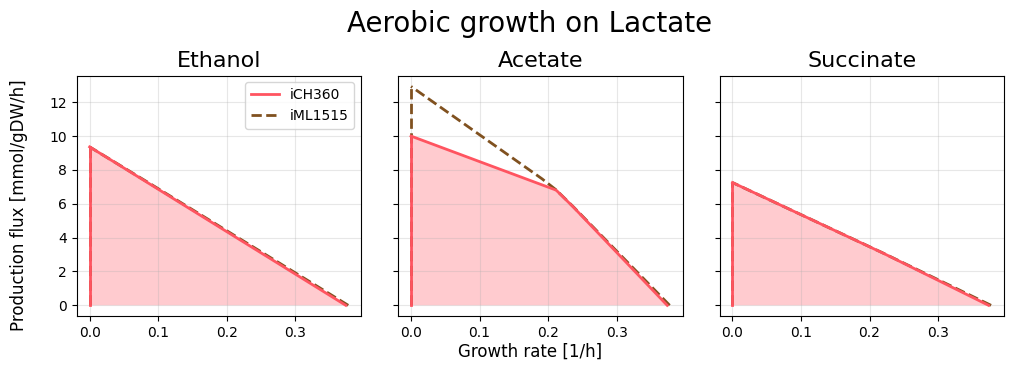

In [7]:
carbon_source='lac__D'
products=['EX_etoh_e','EX_ac_e','EX_succ_e']
product_names=['Ethanol','Acetate','Succinate']
fig,ax=plt.subplots(int(np.ceil(len(products)/3)),3,figsize=(10,3),sharex=True,sharey=True)
ax=ax.reshape(1,-1)
plt.tight_layout()

for k,product in tqdm.tqdm(enumerate(products)):
    coords=np.unravel_index(k,ax.shape)
            #iML1515======
    #aerobic
    fba_utils.plot_envelope(wt_model=iml1515,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        color=iml1515_color,
                        ls='--',
                        label='iML1515',
                        fill=False)
    #=======

    #iCH360 (left)======
    #aerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='iCH360',
                        color=aerobic_color)

    ax[coords].set_title(f'{product_names[k]}',fontsize=16)
    ax[coords].grid(alpha=grid_alpha)

ax[0,0].legend(reverse=True)
fig.suptitle("Aerobic growth on Lactate",fontsize=20,y=1.15)
fig.supxlabel('Growth rate [1/h]',y=-0.02)
fig.supylabel('Production flux [mmol/gDW/h]',x=-0.02)

for extension in ['pdf','svg']:
    fig.savefig(f'../figures/ich360_vs_iml1515_ppp_lactate_type3.{extension}',
                bbox_inches='tight',
                )

## Aerobic Growth on Glycerol

0it [00:00, ?it/s]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpkjyqqb3p.lp
Reading time = 0.02 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpd3sbrwck.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


1it [00:05,  5.54s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpy65qqylp.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpu2lqq864.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


2it [00:10,  5.24s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpq73z7gt7.lp
Reading time = 0.03 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpwttr2gfj.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


3it [00:16,  5.40s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmppk0mtlhr.lp
Reading time = 0.03 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpkluejsa2.lp
Reading time = 0.01 seconds
: 304 rows, 698 columns, 2988 nonzeros


4it [00:21,  5.32s/it]


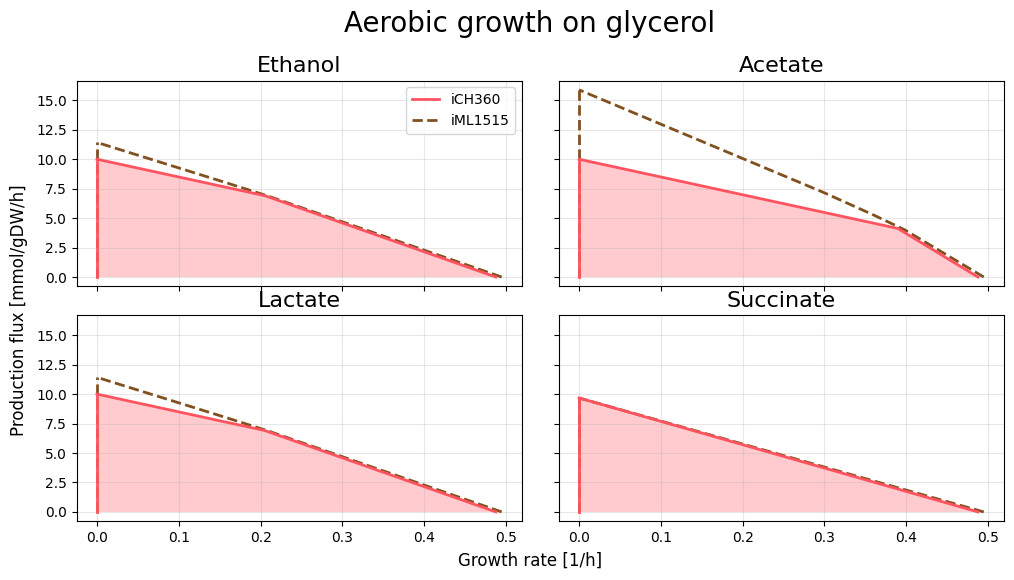

In [8]:
carbon_source='glyc'
products=['EX_etoh_e','EX_ac_e','EX_lac__D_e','EX_succ_e']
product_names=['Ethanol','Acetate','Lactate','Succinate']
fig,ax=plt.subplots(int(np.ceil(len(products)/2)),2,figsize=(10,5),sharex=True,sharey=True)
plt.tight_layout()

for k,product in tqdm.tqdm(enumerate(products)):
    coords=np.unravel_index(k,ax.shape)
    #iML1515======
    #aerobic
    fba_utils.plot_envelope(wt_model=iml1515,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        color=iml1515_color,
                        ls='--',
                        label='iML1515',
                        fill=False)
    #=======
    #iCH360 (left)======
    #aerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='iCH360',
                        color=aerobic_color)

    ax[coords].set_title(f'{product_names[k]}',fontsize=16)
    ax[coords].grid(alpha=grid_alpha)

ax[0,0].legend(reverse=True)
fig.suptitle("Aerobic growth on glycerol",fontsize=20,y=1.1)
fig.supxlabel('Growth rate [1/h]',y=-0.02)
fig.supylabel('Production flux [mmol/gDW/h]',x=-0.02)

for extension in ['svg','pdf']:
    fig.savefig(f'../figures/ich360_vs_iml1515_ppp_glycerol_type3.{extension}',
                bbox_inches='tight',
                )

# iCH360 vs ECC vs ECC2

## Aerobic Growth on Glucose

0it [00:00, ?it/s]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp4w2xtmjc.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpk_jl15le.lp
Reading time = 0.01 seconds
: 486 rows, 998 columns, 4330 nonzeros


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpb5_l57_1.lp
Reading time = 0.00 seconds
: 304 rows, 698 columns, 2988 nonzeros


1it [00:02,  2.58s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmplf5k7qbq.lp
Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpz52u43gr.lp
Reading time = 0.00 seconds
: 486 rows, 998 columns, 4330 nonzeros


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpvf0u_67e.lp
Reading time = 0.01 seconds
: 304 rows, 698 columns, 2988 nonzeros


2it [00:04,  2.09s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp1u6qgni4.lp
Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpfri8310s.lp
Reading time = 0.01 seconds
: 486 rows, 998 columns, 4330 nonzeros


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp6h48j0b9.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


3it [00:06,  1.92s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpovrus134.lp
Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpo306w5so.lp
Reading time = 0.02 seconds
: 486 rows, 998 columns, 4330 nonzeros


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp69v43w_w.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


4it [00:07,  1.95s/it]


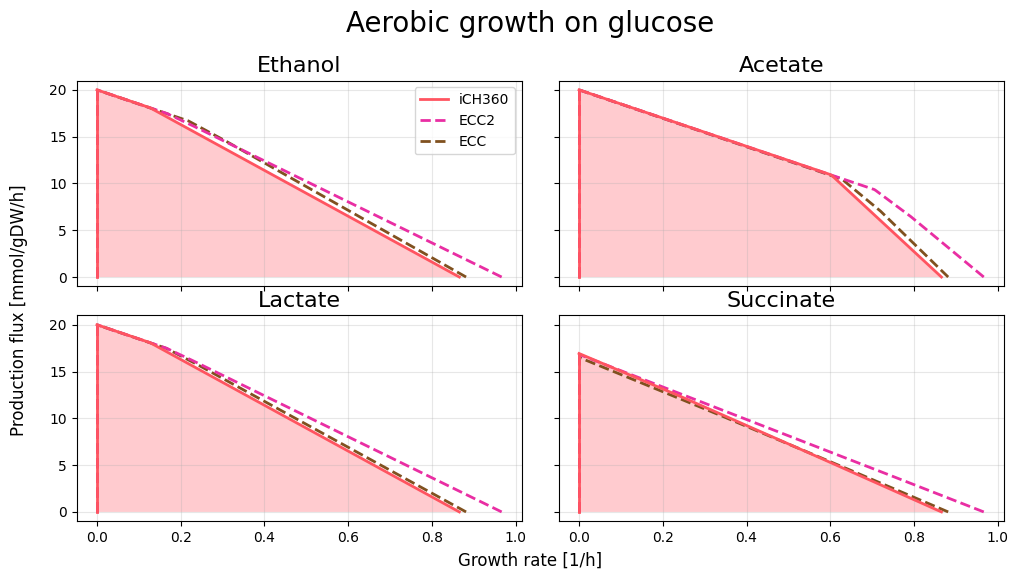

In [9]:
carbon_source='glc__D'
products=['EX_etoh_e','EX_ac_e','EX_lac__D_e','EX_succ_e']
product_names=['Ethanol','Acetate','Lactate','Succinate']
fig,ax=plt.subplots(int(np.ceil(len(products)/2)),2,figsize=(10,5),sharex=True,sharey=True)
plt.tight_layout()

for k,product in tqdm.tqdm(enumerate(products)):
    coords=np.unravel_index(k,ax.shape)
    #=======

    #ECC
    fba_utils.plot_envelope(wt_model=ecc,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='ECC',
                        color=ecc_color,
                        ls='--',
                        fill=False)
    #ECC2
    fba_utils.plot_envelope(wt_model=ecc2,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='ECC2',
                        color=ecc2_color,
                        ls='--',
                        fill=False)
        #iCH360 ======
    #aerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='iCH360',
                        color=aerobic_color)
    ax[coords].set_title(f'{product_names[k]}',fontsize=16)
    ax[coords].grid(alpha=grid_alpha)

ax[0,0].legend(reverse=True)
ax[0,0].grid(alpha=grid_alpha)
ax[0,1].grid(alpha=grid_alpha)
ax[1,0].grid(alpha=grid_alpha)
ax[1,1].grid(alpha=grid_alpha)
fig.suptitle("Aerobic growth on glucose",fontsize=20,y=1.1)
fig.supxlabel('Growth rate [1/h]',y=-0.02)
fig.supylabel('Production flux [mmol/gDW/h]',x=-0.02)

for extension in ['pdf','svg']:
    fig.savefig(f'../figures/ich360_vs_ecc_ecc2__ppp_glucose_aerobic.{extension}',
                bbox_inches='tight',
                )

## Anaerobic growth on glucose

0it [00:00, ?it/s]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp6m7nkvsn.lp
Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmplord97qm.lp
Reading time = 0.02 seconds
: 486 rows, 998 columns, 4330 nonzeros


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpe75z6c58.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


1it [00:01,  1.77s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpd2o1nsqv.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpmb7argiv.lp
Reading time = 0.00 seconds
: 486 rows, 998 columns, 4330 nonzeros


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmprroi700_.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


2it [00:03,  1.75s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpx_vx91q3.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp1unukbsv.lp
Reading time = 0.02 seconds
: 486 rows, 998 columns, 4330 nonzeros


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp3ja2k85b.lp
Reading time = 0.01 seconds
: 304 rows, 698 columns, 2988 nonzeros


3it [00:05,  1.76s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpbok8l9fz.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpkr4ysayf.lp
Reading time = 0.01 seconds
: 486 rows, 998 columns, 4330 nonzeros


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpcmhbn4is.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


4it [00:07,  1.76s/it]


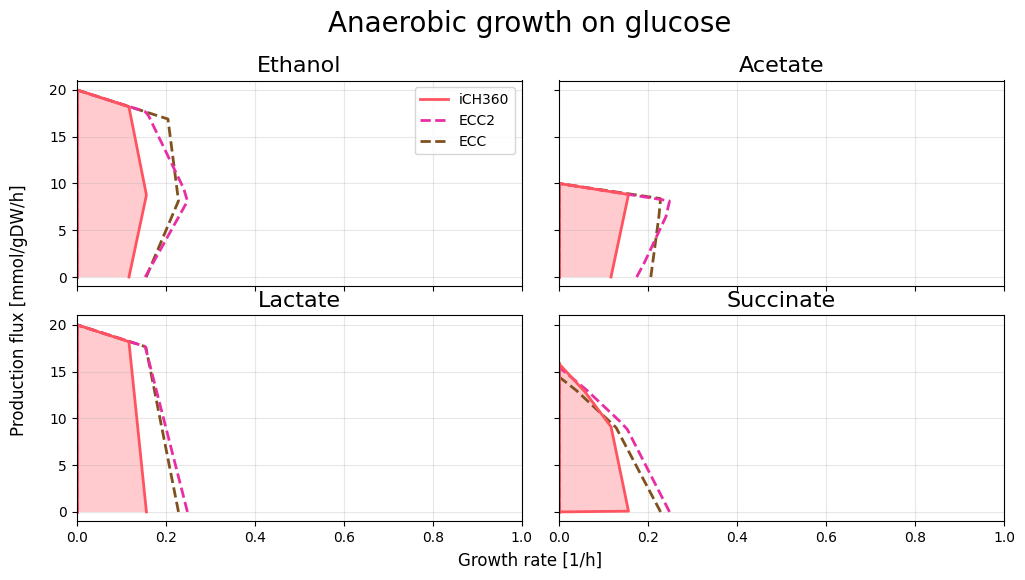

In [10]:
carbon_source='glc__D'
products=['EX_etoh_e','EX_ac_e','EX_lac__D_e','EX_succ_e']
product_names=['Ethanol','Acetate','Lactate','Succinate']
fig,ax=plt.subplots(int(np.ceil(len(products)/2)),2,figsize=(10,5),sharex=True,sharey=True)
plt.tight_layout()

for k,product in tqdm.tqdm(enumerate(products)):
    coords=np.unravel_index(k,ax.shape)
    #=======

    #ECC
    fba_utils.plot_envelope(wt_model=ecc,
                        knockouts=['EX_o2_e'],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='ECC',
                        color=ecc_color,
                        ls='--',
                        fill=False)
    #ECC2
    fba_utils.plot_envelope(wt_model=ecc2,
                        knockouts=['EX_o2_e'],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='ECC2',
                        color=ecc2_color,
                        ls='--',
                        fill=False)
        #iCH360 ======
    #aerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=['EX_o2_e'],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='iCH360',
                        color=aerobic_color)
    ax[coords].set_title(f'{product_names[k]}',fontsize=16)
    ax[coords].set_xlim(0,1)
    ax[coords].grid(alpha=grid_alpha)

ax[0,0].legend(reverse=True)
ax[0,0].grid(alpha=grid_alpha)
ax[0,1].grid(alpha=grid_alpha)
ax[1,0].grid(alpha=grid_alpha)
ax[1,1].grid(alpha=grid_alpha)
fig.suptitle("Anaerobic growth on glucose",fontsize=20,y=1.1)
fig.supxlabel('Growth rate [1/h]',y=-0.02)
fig.supylabel('Production flux [mmol/gDW/h]',x=-0.02)

for extension in ['pdf','svg']:
    fig.savefig(f'../figures/ich360_vs_ecc_ecc2__ppp_glucose_anaerobic.{extension}',
                bbox_inches='tight',
                )

## Aerobic growth on lactate

0it [00:00, ?it/s]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpg92yzkxl.lp
Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpm579w49f.lp
Reading time = 0.02 seconds
: 486 rows, 998 columns, 4330 nonzeros


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpy06og79w.lp
Reading time = 0.03 seconds
: 304 rows, 698 columns, 2988 nonzeros


1it [00:03,  3.61s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp5l776ydg.lp
Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp5sp73gk8.lp
Reading time = 0.03 seconds
: 486 rows, 998 columns, 4330 nonzeros


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp9y0zsbnj.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


2it [00:07,  3.97s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpqdxc6hnt.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp86i2zark.lp
Reading time = 0.03 seconds
: 486 rows, 998 columns, 4330 nonzeros


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmptw7n9kk4.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


3it [00:11,  3.98s/it]


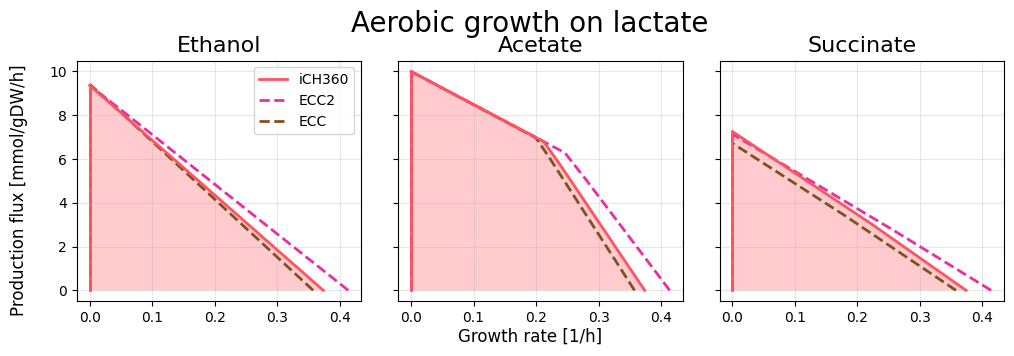

In [12]:
carbon_source='lac__D'
products=['EX_etoh_e','EX_ac_e','EX_succ_e']
product_names=['Ethanol','Acetate','Succinate']
fig,ax=plt.subplots(int(np.ceil(len(products)/3)),3,figsize=(10,3),sharex=True,sharey=True)
plt.tight_layout()

for k,product in tqdm.tqdm(enumerate(products)):
    coords=np.unravel_index(k,ax.shape)
    #=======

    #ECC
    fba_utils.plot_envelope(wt_model=ecc,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='ECC',
                        color=ecc_color,
                        ls='--',
                        fill=False)
    #ECC2
    fba_utils.plot_envelope(wt_model=ecc2,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='ECC2',
                        color=ecc2_color,
                        ls='--',
                        fill=False)
        #iCH360 ======
    #aerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='iCH360',
                        color=aerobic_color)
    ax[coords].set_title(f'{product_names[k]}',fontsize=16)
    ax[coords].grid(alpha=grid_alpha)

ax[0].legend(reverse=True)
ax[0].grid(alpha=grid_alpha)
ax[1].grid(alpha=grid_alpha)
ax[2].grid(alpha=grid_alpha)
fig.suptitle("Aerobic growth on lactate",fontsize=20,y=1.1)
fig.supxlabel('Growth rate [1/h]',y=-0.02)
fig.supylabel('Production flux [mmol/gDW/h]',x=-0.02)

for extension in ['pdf','svg']:
    fig.savefig(f'../figures/ich360_vs_ecc_ecc2__ppp_lactate_aerobic.{extension}',
                bbox_inches='tight',
                )

## Aerobic growth on Glycerol

0it [00:00, ?it/s]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpcce6gkyr.lp
Reading time = 0.04 seconds
: 486 rows, 998 columns, 4330 nonzeros


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp61iax_x1.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


1it [00:03,  3.43s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp5p0_lf37.lp
Reading time = 0.02 seconds
: 486 rows, 998 columns, 4330 nonzeros


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpue61wz4o.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


2it [00:06,  3.18s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpjmv5kq4r.lp
Reading time = 0.02 seconds
: 486 rows, 998 columns, 4330 nonzeros


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp2m65661z.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


3it [00:09,  3.04s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpw8nwncgu.lp
Reading time = 0.02 seconds
: 486 rows, 998 columns, 4330 nonzeros


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpzkawu5st.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros


4it [00:12,  3.13s/it]


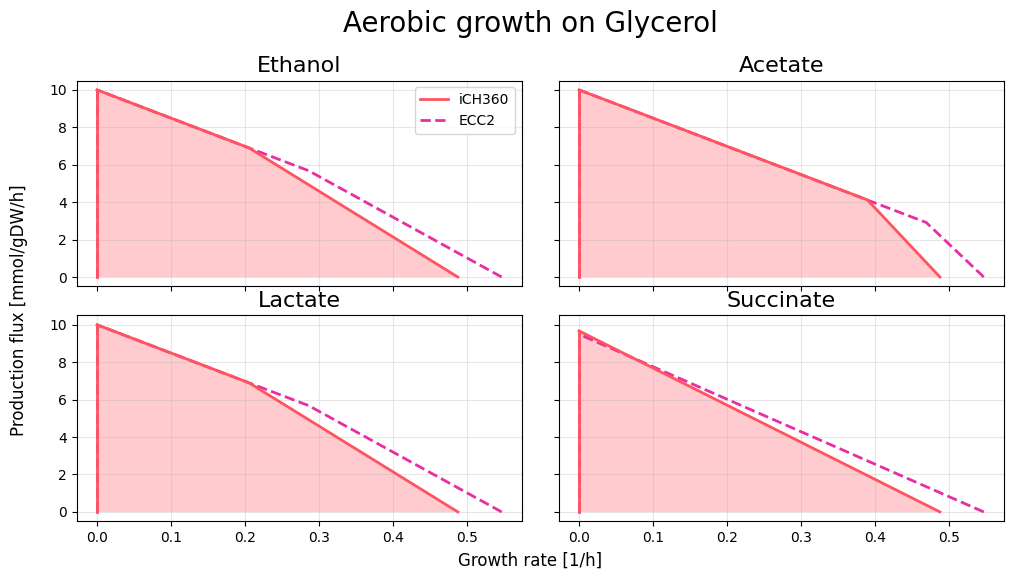

In [15]:
carbon_source='glyc'
products=['EX_etoh_e','EX_ac_e','EX_lac__D_e','EX_succ_e']
product_names=['Ethanol','Acetate','Lactate','Succinate']
fig,ax=plt.subplots(int(np.ceil(len(products)/2)),2,figsize=(10,5),sharex=True,sharey=True)
plt.tight_layout()

for k,product in tqdm.tqdm(enumerate(products)):
    coords=np.unravel_index(k,ax.shape)
    #=======

    
    #ECC2
    fba_utils.plot_envelope(wt_model=ecc2,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='ECC2',
                        color=ecc2_color,
                        ls='--',
                        fill=False)
        #iCH360 ======
    #aerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='iCH360',
                        color=aerobic_color)
    ax[coords].set_title(f'{product_names[k]}',fontsize=16)
    ax[coords].grid(alpha=grid_alpha)

ax[0,0].legend(reverse=True)
ax[0,0].grid(alpha=grid_alpha)
ax[0,1].grid(alpha=grid_alpha)
ax[1,0].grid(alpha=grid_alpha)
ax[1,1].grid(alpha=grid_alpha)
fig.suptitle("Aerobic growth on Glycerol",fontsize=20,y=1.1)
fig.supxlabel('Growth rate [1/h]',y=-0.02)
fig.supylabel('Production flux [mmol/gDW/h]',x=-0.02)

for extension in ['pdf','svg']:
    fig.savefig(f'../figures/ich360_vs_ecc_ecc2__ppp_glycerol_aerobic.{extension}',
                bbox_inches='tight',
                )

# ich360 vs ich360 red

## Growth on Glucose

0it [00:00, ?it/s]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpcce9oo5w.lp
Reading time = 0.01 seconds
: 304 rows, 662 columns, 2814 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpupcqtqbv.lp
Reading time = 0.01 seconds
: 304 rows, 662 columns, 2814 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpnavv6y7j.lp
Reading time = 0.01 seconds
: 304 rows, 698 columns, 2988 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpoftujhyj.lp
Reading time = 0.01 seconds
: 304 rows, 698 columns, 2988 nonzeros


1it [00:02,  2.63s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpp2luw3op.lp
Reading time = 0.01 seconds
: 304 rows, 662 columns, 2814 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpv3bm51xj.lp
Reading time = 0.01 seconds
: 304 rows, 662 columns, 2814 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp2_5vfc98.lp
Reading time = 0.02 seconds
: 304 rows, 698 columns, 2988 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp5z718ywe.lp
Reading time = 0.01 seconds
: 304 rows, 698 columns, 2988 nonzeros


2it [00:05,  2.65s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpmftmip1h.lp
Reading time = 0.01 seconds
: 304 rows, 662 columns, 2814 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpl0how3vi.lp
Reading time = 0.01 seconds
: 304 rows, 662 columns, 2814 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpm94dr2mj.lp
Reading time = 0.01 seconds
: 304 rows, 698 columns, 2988 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpo0z4_51e.lp
Reading time = 0.01 seconds
: 304 rows, 698 columns, 2988 nonzeros


3it [00:07,  2.63s/it]

Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp47a0ot10.lp
Reading time = 0.02 seconds
: 304 rows, 662 columns, 2814 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp010ago5b.lp
Reading time = 0.01 seconds
: 304 rows, 662 columns, 2814 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmp7hq3xyqv.lp
Reading time = 0.01 seconds
: 304 rows, 698 columns, 2988 nonzeros
Read LP format model from file C:\Users\marco\AppData\Local\Temp\tmpe0drjv1g.lp
Reading time = 0.01 seconds
: 304 rows, 698 columns, 2988 nonzeros


4it [00:10,  2.63s/it]


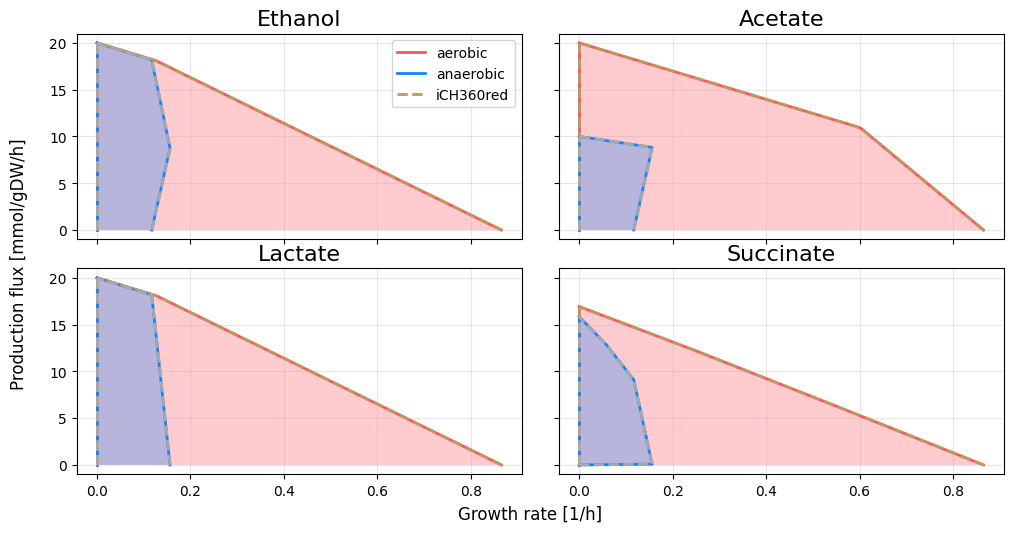

In [22]:
carbon_source='glc__D'
products=['EX_etoh_e','EX_ac_e','EX_lac__D_e','EX_succ_e']
product_names=['Ethanol','Acetate','Lactate','Succinate']
aerobic_color="#ff5460ff"
anaerobic_color="#1484ffff"
ich360red_color='#bd995bff'
fig,ax=plt.subplots(int(np.ceil(len(products)/2)),2,figsize=(10,5),sharex=True,sharey=True)
plt.tight_layout()

for k,product in tqdm.tqdm(enumerate(products)):
    coords=np.unravel_index(k,ax.shape)
    #iCH360 (left)======
    #aerobic
    fba_utils.plot_envelope(wt_model=ich360_red,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='aerobic',
                        color=aerobic_color)
    #anaerobic
    fba_utils.plot_envelope(wt_model=ich360_red,
                        knockouts=['EX_o2_e'],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='anaerobic',
                        color=anaerobic_color)
    #iML1515======
    #aerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        color=ich360red_color,
                        ls='--',
                        label='iCH360red',
                        fill=False)
    #anaerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=['EX_o2_e'],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        color='darkgrey',
                        label=None,
                        ls='--',
                        fill=False)
    #=======
    ax[coords].set_title(f'{product_names[k]}',fontsize=16)
    ax[coords].grid(alpha=grid_alpha)

ax[0,0].legend()
fig.supxlabel('Growth rate [1/h]',y=-0.02)
fig.supylabel('Production flux [mmol/gDW/h]',x=-0.02)

for extension in ['pdf']:
    fig.savefig(f'../figures/ich360_vs_ich360red_ppp_glucose_type3.{extension}',
                bbox_inches='tight',
                )